## Notebook para analizar intentos de suicidio. Datos tomados de la Secretaría de Salud de Medellín

In [2]:
import pandas as pd; import numpy as np; import seaborn as sns; import matplotlib.pyplot as plt

df_i = pd.read_csv('intento_suicidio.csv')

In [3]:
##Estilos
#-------------------------Estilos para los gráficos
import matplotlib as mpl
plt.style.use("fivethirtyeight") 
mpl.rcParams["font.size"]=10.5 
mpl.rcParams["legend.fontsize"]=14
mpl.rcParams["font.family"]="serif"
mpl.rcParams["font.weight"]="bold"
mpl.rcParams["legend.fancybox"]=True
mpl.rcParams["xtick.labelsize"]=12
mpl.rcParams["ytick.labelsize"]=12
mpl.rcParams["figure.titleweight"]="bold"
mpl.rcParams["axes.labelweight"]="bold"
mpl.rcParams["figure.facecolor"]="white"
mpl.rcParams["axes.facecolor"]="white"
mpl.rcParams["axes.edgecolor"]="0.2"
mpl.rcParams["axes.linewidth"]=1
mpl.rcParams["axes.titleweight"]="bold"
mpl.rcParams["axes.labelsize"]=16
mpl.rcParams["figure.titlesize"]=20
mpl.rcParams["axes.titlesize"]=18
mpl.rcParams["figure.labelsize"]=16
mpl.rcParams["figure.labelweight"]="bold"
mpl.rcParams['axes.grid']=False

### Preguntas a responder

* ¿Cuál es la distribución de la edad?
* ¿Cuántos casos hay por comuna/corregimiento? separado por sexo
* ¿Cuántos casos hay por estrato? separado por trastornos
* ¿Cuántos casos hay por año y por mes?
* Gráfico de pastel con problemas economicos/laborales, problemas familiares/pareja, intentos previos de suicidio, abuso de alcohol o psa

<Axes: xlabel='edad', ylabel='Count'>

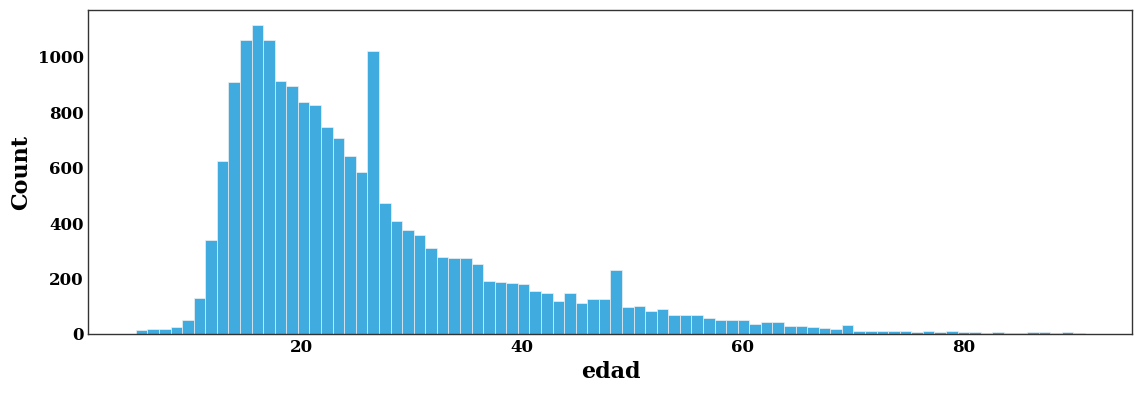

In [4]:
##Distribución de la edad

fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(df_i['edad'])

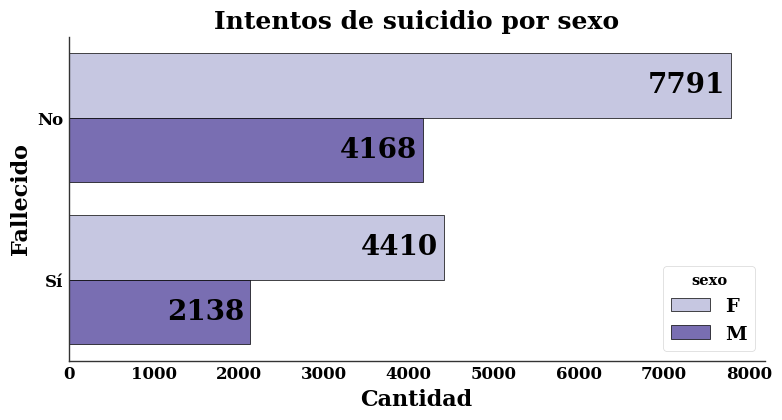

In [5]:
##Intentos logrados por sexo

fallecidos_sexo = df_i.groupby(['fallecido','sexo'])['mes'].count().reset_index()

fig, ax = plt.subplots(figsize=(8,4))

bar = sns.barplot(data=fallecidos_sexo,x='mes',y='fallecido',ax=ax,hue='sexo',palette='Purples',edgecolor='k',saturation=1)
for container in bar.containers:
    ax.bar_label(container,padding=-60,fontsize=20)
ax.set_xlabel('Cantidad')
ax.set_ylabel('Fallecido')
ax.set_title('Intentos de suicidio por sexo')
ax.spines[['top','right']].set_visible(False)

In [6]:
df_i

,fecha,año,mes,edad,sexo,estrato,gestante,hospitalizado,fallecido,intentos previos,problemas_laborales_economicos,problemas_familia_pareja,maltrato fps,trastornos,alcohol o spa,lugar_into,remision psiquiatria,remision psicologia,comuna
0,3/10/2014,2014,10,13,F,NaN,No,Sí,No,NaN,No,No,No,No,No,NaN,NaN,NaN,Buenos Aires
1,3/11/2014,2014,11,31,M,NaN,No,No,Sí,NaN,No,No,No,No,No,NaN,NaN,NaN,Altavista
2,3/12/2014,2014,12,19,F,NaN,No,No,Sí,NaN,No,No,No,No,No,NaN,NaN,NaN,San Antonio de Prado
3,30/01/2014,2014,1,50,F,NaN,No,Sí,No,NaN,No,No,No,No,No,NaN,NaN,NaN,San Antonio de Prado
4,30/04/2014,2014,4,41,F,NaN,No,No,Sí,NaN,No,No,No,No,No,NaN,NaN,NaN,Villa Hermosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18502,3/07/2014,2014,7,30,F,NaN,No,Sí,No,NaN,No,No,No,No,No,NaN,NaN,NaN,Manrique
18503,3/07/2014,2014,7,22,M,NaN,No,Sí,No,NaN,No,No,No,No,No,NaN,NaN,NaN,Doce de Octubre
18504,3/08/2014,2014,8,25,M,NaN,No,Sí,No,NaN,No,No,No,No,No,NaN,NaN,NaN,La Candelaria
18505,3/09/2014,2014,9,22,F,NaN,No,Sí,No,NaN,No,No,No,No,No,NaN,NaN,NaN,Guayabal


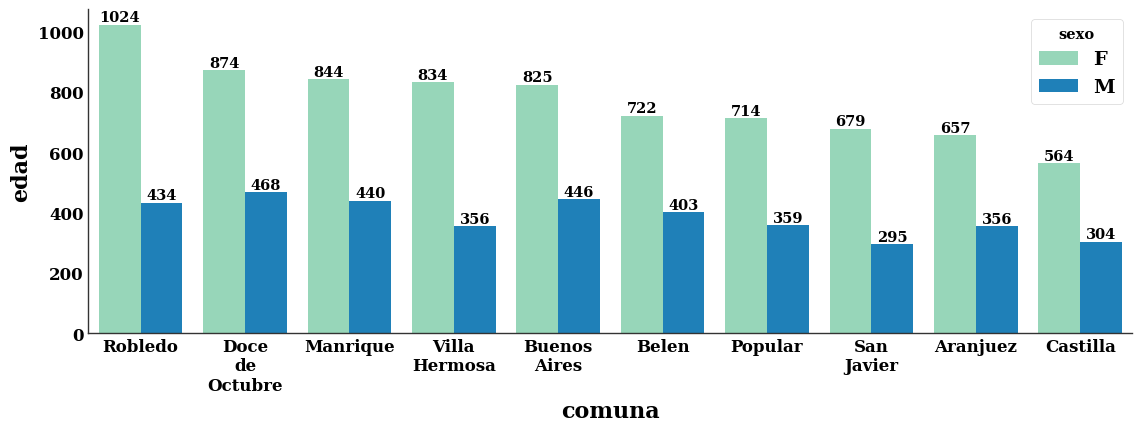

In [7]:
#Casos por comuna
comuna = df_i.dropna(subset=['comuna'])

fig, ax = plt.subplots(figsize=(12,4))

top_comuna_sexo = comuna.groupby(['comuna','sexo'])['edad'].count().reset_index().sort_values(by='edad',ascending=False)['comuna'].head(10)

comuna_sexo = comuna.loc[comuna['comuna'].isin(top_comuna_sexo)].groupby(['comuna','sexo'])['edad'].count().reset_index().sort_values(by='edad',ascending=False)
xlabels = [i.replace(' ','\n') for i in comuna_sexo['comuna'].unique()]
bar = sns.barplot(data=comuna_sexo,x='comuna',y='edad',ax=ax,orient='x',hue='sexo',palette='YlGnBu',saturation=1)

ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels)
for container in bar.containers:
    ax.bar_label(container)

ax.spines[['top','right']].set_visible(False)

In [8]:
comuna.describe()

,año,mes,edad,estrato,remision psiquiatria,remision psicologia
count,17151.000000,17151.000000,17151.000000,7971.000000,10331.000000,10330.000000
mean,2018.279051,6.586496,25.685616,2.447999,1.093602,1.426815
std,2.494127,3.385817,12.380754,0.805969,0.291288,0.494639
min,2014.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,2016.000000,4.000000,17.000000,2.000000,1.000000,1.000000
50%,2018.000000,7.000000,22.000000,2.000000,1.000000,1.000000
75%,2020.000000,10.000000,31.000000,3.000000,1.000000,2.000000
max,2022.000000,12.000000,91.000000,6.000000,2.000000,2.000000


In [9]:
comuna.loc[comuna['edad']>=6].to_csv('suicidios.csv',index=None)

In [10]:
estrato = comuna.dropna(subset=['estrato'])

estrato.to_csv('estrato.csv',index=None)

In [11]:
comuna.loc[comuna['edad']>=6]['fallecido'].value_counts()

fallecido
No    11147
Sí     5997
Name: count, dtype: int64

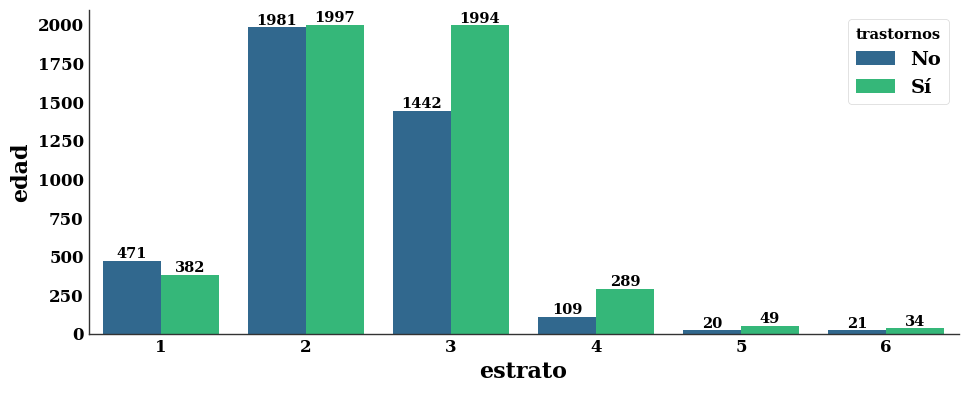

In [14]:
##Casos por estrato
fig, ax = plt.subplots(figsize=(10,4))
estrato = df_i.dropna(subset=['estrato'])

estrato_trastorno = estrato.groupby(['estrato','trastornos'])['edad'].count().reset_index()
bar = sns.barplot(data=estrato_trastorno,x='estrato',y='edad',hue='trastornos',palette='viridis',saturation=1)
ax.set_xticks(np.arange(0,6))
ax.set_xticklabels(np.arange(1,7))
ax.spines[['top','right']].set_visible(False)

for container in bar.containers:
    ax.bar_label(container)

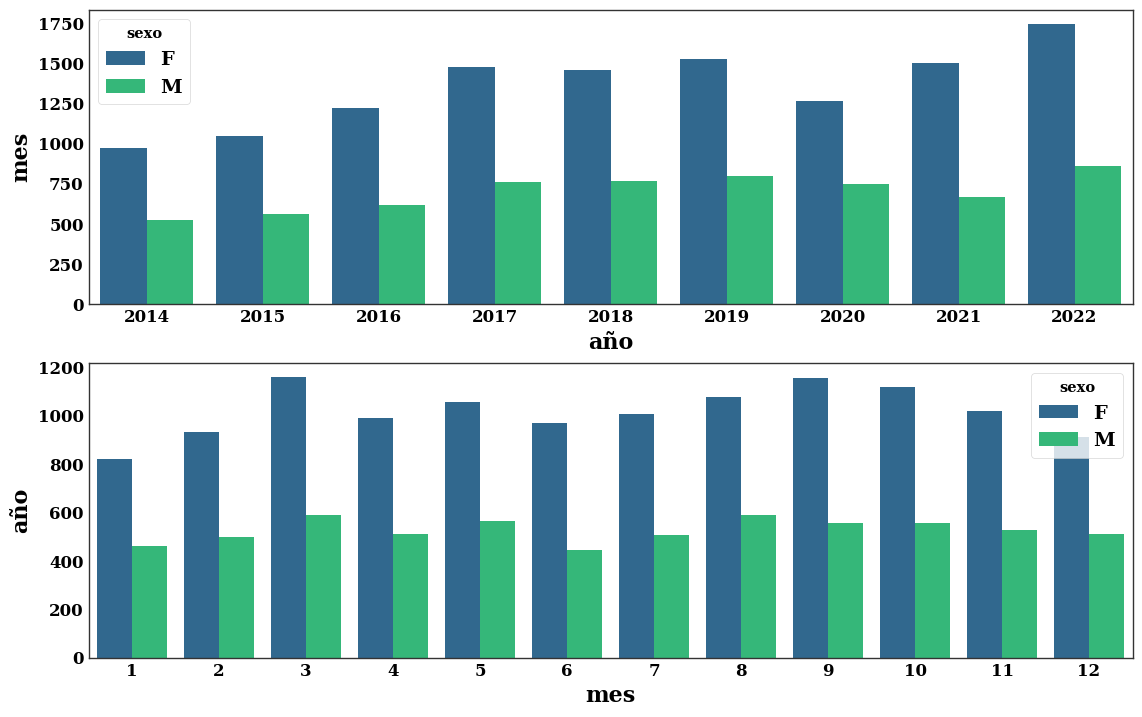

In [122]:
##Casos por año y por mes

fig, ax = plt.subplots(figsize=(12,8),nrows=2)
año_sexo = df_i.groupby(['año','sexo'])['mes'].count().reset_index()
mes_sexo = df_i.groupby(['mes','sexo'])['año'].count().reset_index()

sns.barplot(data=año_sexo,x='año',y='mes',hue='sexo',palette='viridis',saturation=1,ax=ax[0])
sns.barplot(data=mes_sexo,x='mes',y='año',hue='sexo',palette='viridis',saturation=1,ax=ax[1])

plt.show()

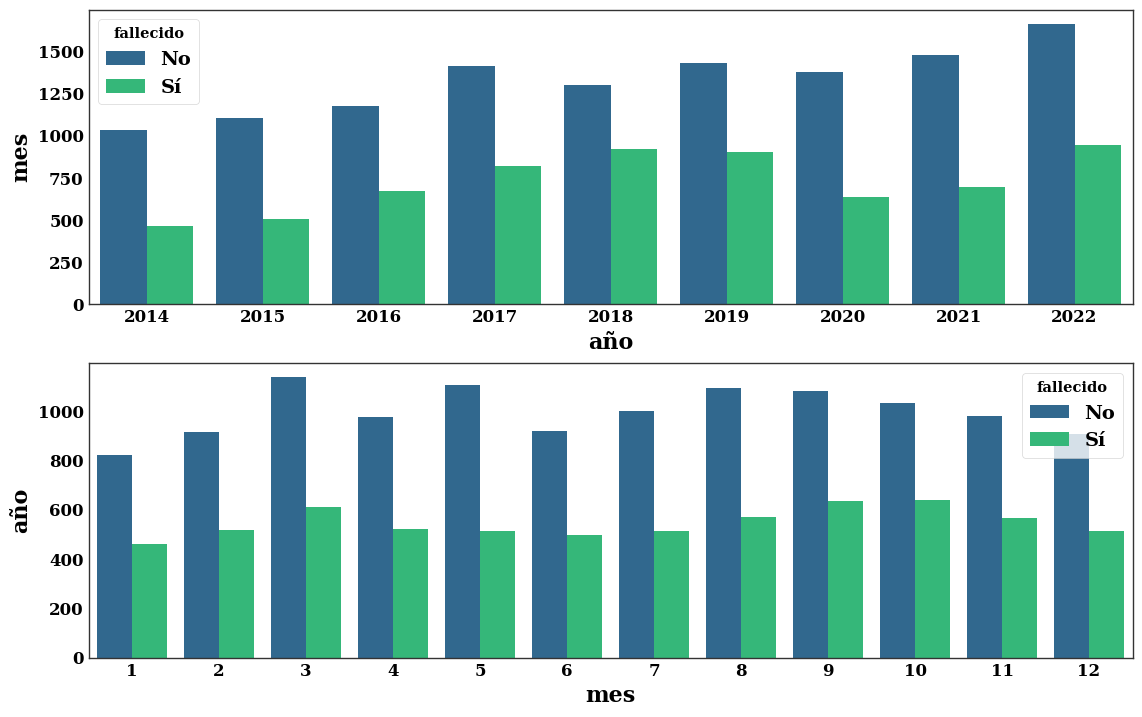

In [127]:
##Casos por año y por mes

fig, ax = plt.subplots(figsize=(12,8),nrows=2)
año_sexo = df_i.groupby(['año','fallecido'])['mes'].count().reset_index()
mes_sexo = df_i.groupby(['mes','fallecido'])['año'].count().reset_index()

sns.barplot(data=año_sexo,x='año',y='mes',hue='fallecido',palette='viridis',saturation=1,ax=ax[0])
sns.barplot(data=mes_sexo,x='mes',y='año',hue='fallecido',palette='viridis',saturation=1,ax=ax[1])

plt.show()

In [ ]:
##Casos por año y por mes

fig, ax = plt.subplots(figsize=(12,8),nrows=2)
año_sexo = df_i.groupby(['año','fallecido'])['mes'].count().reset_index()
mes_sexo = df_i.groupby(['mes','fallecido'])['año'].count().reset_index()

sns.barplot(data=año_sexo,x='año',y='mes',hue='fallecido',palette='viridis',saturation=1,ax=ax[0])
sns.barplot(data=mes_sexo,x='mes',y='año',hue='fallecido',palette='viridis',saturation=1,ax=ax[1])

plt.show()

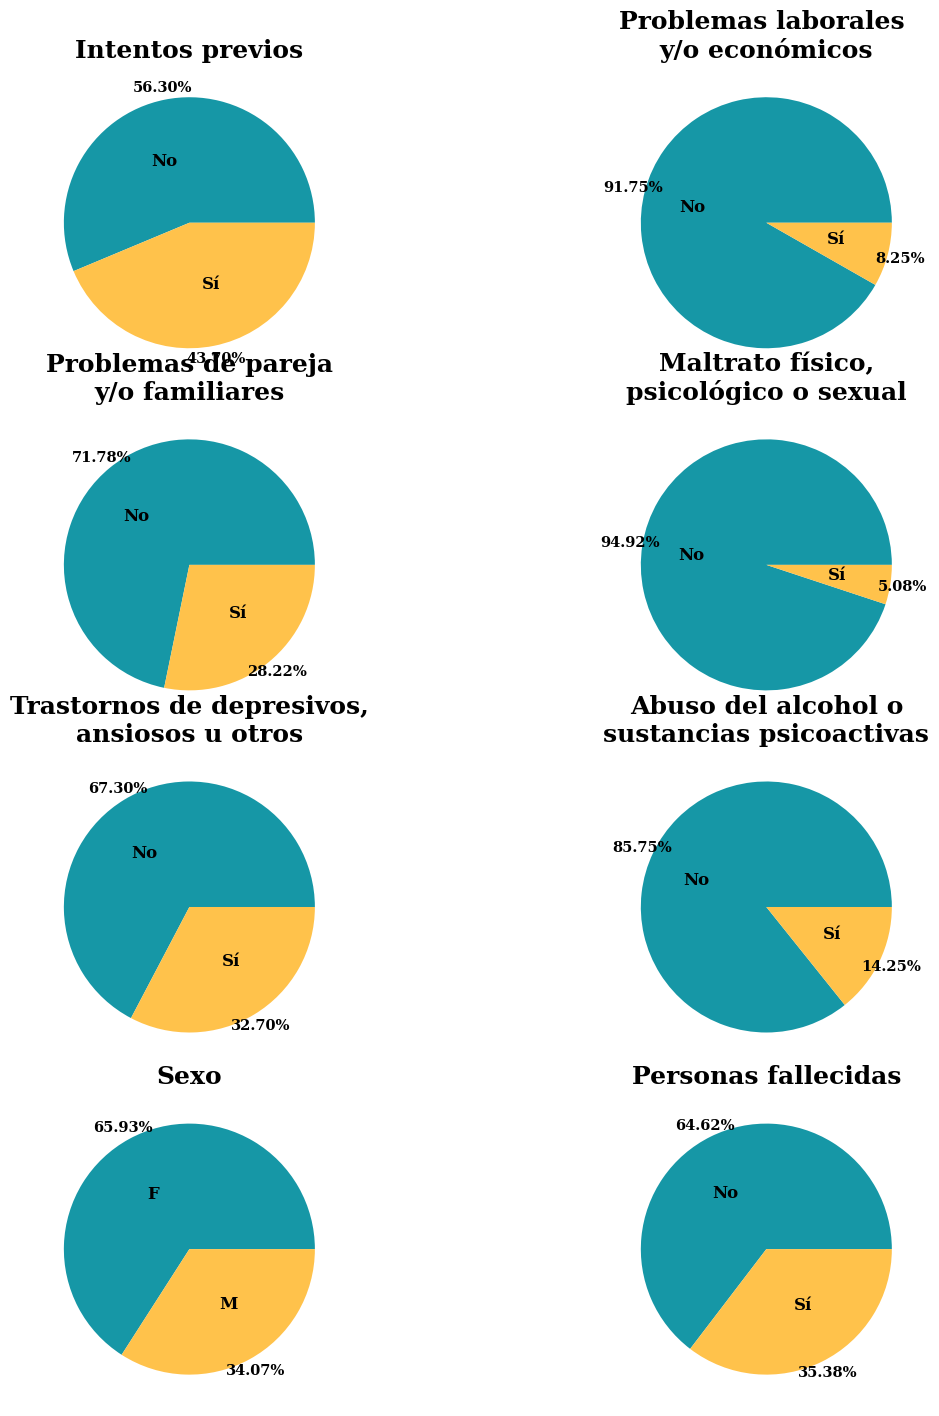

In [156]:
##

pastel = df_i[['intentos previos','problemas_laborales_economicos','problemas_familia_pareja','maltrato fps','trastornos','alcohol o spa',
               'sexo','fallecido']]

titulos = ['Intentos previos','Problemas laborales \ny/o económicos'
           ,'Problemas de pareja\ny/o familiares','Maltrato físico,\npsicológico o sexual','Trastornos de depresivos,\nansiosos u otros'
           ,'Abuso del alcohol o\nsustancias psicoactivas','Sexo','Personas fallecidas']
fig, ax = plt.subplots(figsize=(12,14),ncols=2,nrows=4)
fig.tight_layout(h_pad=0,w_pad=-1)
ax = ax.flat
colors = ['#1697a6','#ffc24b','#0e606b','#fed9b7','#f47068','#6a8532','#00b4d8']

for i, col in enumerate(pastel):
    pastel[col].value_counts().plot(kind='pie',ax=ax[i],colors=colors,labeldistance=0.5,autopct='%.2f%%',pctdistance=1.1,radius=1)
    ax[i].set_ylabel('')
    ax[i].set_title(f'{titulos[i]}')